<a href="https://colab.research.google.com/github/fachiny17/machine_learning/blob/main/tensorflow_course/03_introduction_to_computer_vision_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Network and Computer Vision with Tensorflow

Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front.

## Get the data
The images we're working with are from the Food101 dataset (101 different classes of food): https://www.kaggle.com/dansbecker/food-101

However we've modified it to only use two classes (pizza and steak) using the image data modification notebok: ...

>**Note:** We start with a smaller dataset so we can experiment quickly and figure what works (or better yet what doesn't work) before scaling up.

In [1]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall ()
zip_ref.close()

--2025-07-18 10:27:58--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 192.178.219.207, 74.125.139.207, 173.194.210.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|192.178.219.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   176MB/s    in 0.6s    

2025-07-18 10:27:58 (176 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data (become one with it)
A very crucial step at the beginning of any machine learning project is becoming one wth the data.
AAnd for a computer vision project... this usually means visualizing many samples of your data.

In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train/

pizza  steak


In [4]:
!ls pizza_steak/test/

pizza  steak


In [5]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [6]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.


In [7]:
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Jul 18 10:27 .
drwxr-xr-x 1 root root 4096 Jul 18 10:27 ..
drwxr-xr-x 4 root root 4096 Jul 18 10:27 test
drwxr-xr-x 4 root root 4096 Jul 18 10:27 train


In [8]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

To visualize our images, first let's get class names programmatically

In [9]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [10]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the targe directory (we'll view images from here)
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (512, 512, 3)


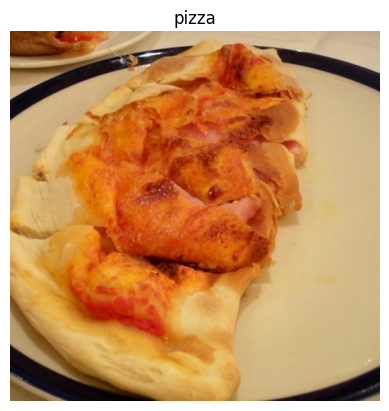

In [11]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [12]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[109,  46,  11],
        [106,  43,   8],
        [104,  41,   6],
        ...,
        [190, 167, 136],
        [190, 167, 136],
        [190, 167, 136]],

       [[103,  41,   4],
        [106,  44,   7],
        [109,  47,  10],
        ...,
        [190, 167, 136],
        [190, 167, 136],
        [190, 167, 136]],

       [[ 99,  40,   0],
        [105,  46,   6],
        [110,  51,  11],
        ...,
        [191, 168, 137],
        [191, 168, 137],
        [191, 168, 137]],

       ...,

       [[139, 111,  63],
        [138, 110,  62],
        [138, 110,  63],
        ...,
        [166, 138,  90],
        [164, 136,  86],
        [163, 135,  85]],

       [[141, 114,  61],
        [140, 113,  60],
        [140, 112,  62],
        ...,
        [165, 134,  87],
        [164, 133,  86],
        [163, 132,  85]],

       [[143, 116,  61],
        [142, 115,  60],
        [141, 113,  63],
        ...,
        [166, 135,  8

In [13]:
# View the image shape
img.shape # returns width, height, colour channels

(512, 512, 3)

In [14]:
# Get all the pixel values between 0 and 1
img/255.

array([[[0.42745098, 0.18039216, 0.04313725],
        [0.41568627, 0.16862745, 0.03137255],
        [0.40784314, 0.16078431, 0.02352941],
        ...,
        [0.74509804, 0.65490196, 0.53333333],
        [0.74509804, 0.65490196, 0.53333333],
        [0.74509804, 0.65490196, 0.53333333]],

       [[0.40392157, 0.16078431, 0.01568627],
        [0.41568627, 0.17254902, 0.02745098],
        [0.42745098, 0.18431373, 0.03921569],
        ...,
        [0.74509804, 0.65490196, 0.53333333],
        [0.74509804, 0.65490196, 0.53333333],
        [0.74509804, 0.65490196, 0.53333333]],

       [[0.38823529, 0.15686275, 0.        ],
        [0.41176471, 0.18039216, 0.02352941],
        [0.43137255, 0.2       , 0.04313725],
        ...,
        [0.74901961, 0.65882353, 0.5372549 ],
        [0.74901961, 0.65882353, 0.5372549 ],
        [0.74901961, 0.65882353, 0.5372549 ]],

       ...,

       [[0.54509804, 0.43529412, 0.24705882],
        [0.54117647, 0.43137255, 0.24313725],
        [0.54117647, 0

## An end-to-end example
Let's build a convolutional neural network to find patterns in our images, more specifically we need a way to:
* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our taining data

In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 and 1, also called scaling  or normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directoies
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [17]:
# Build a CNN model (same as the Tiny VGG in the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 114s 2s/step - accuracy: 0.5878 - loss: 0.6857 - val_accuracy: 0.8240 - val_loss: 0.4270
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 134s 2s/step - accuracy: 0.7802 - loss: 0.4615 - val_accuracy: 0.8300 - val_loss: 0.3877
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 103s 2s/step - accuracy: 0.8223 - loss: 0.4173 - val_accuracy: 0.8620 - val_loss: 0.3356
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 105s 2s/step - accuracy: 0.8319 - loss: 0.3811 - val_accuracy: 0.7880 - val_loss: 0.4165
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.8152 - loss: 0.4108 - val_accuracy: 0.8560 - val_loss: 0.3124


In [18]:
# Our model's summary
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        28,091 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

## Using the same model as before
Let's replicate the model we've built in a previous section to see if it woks with our image data.
The model we're building is from the [TensorFLow playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.24887&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false).

In [19]:
train_data

In [20]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 148ms/step - accuracy: 0.6210 - loss: 0.8293 - val_accuracy: 0.7400 - val_loss: 0.6059
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 152ms/step - accuracy: 0.7419 - loss: 0.6048 - val_accuracy: 0.7560 - val_loss: 0.5920
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 136ms/step - accuracy: 0.7136 - loss: 0.6119 - val_accuracy: 0.7640 - val_loss: 0.5820
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 155ms/step - accuracy: 0.7815 - loss: 0.5631 - val_accuracy: 0.7800 - val_loss: 0.5696
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 162ms/step - accuracy: 0.7750 - loss: 0.5707 - val_accuracy: 0.7920 - val_loss: 0.5589


In [21]:
# summary of model_2
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │       602,116 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,806,425 (6.89 MB)

 Trainable params: 602,141 (2.30 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,204,284 (4.59 MB)

Despite having 20x more parameters than our CNN (model_1), model_2 performs terribly...let's try to improve it.

In [22]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 22s 430ms/step - accuracy: 0.5554 - loss: 3.8294 - val_accuracy: 0.7440 - val_loss: 0.6660
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 410ms/step - accuracy: 0.7123 - loss: 0.8812 - val_accuracy: 0.6680 - val_loss: 0.9913
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 420ms/step - accuracy: 0.6933 - loss: 0.8068 - val_accuracy: 0.5900 - val_loss: 1.8853
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 402ms/step - accuracy: 0.7293 - loss: 0.7311 - val_accuracy: 0.7600 - val_loss: 0.4819
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 423ms/step - accuracy: 0.7716 - loss: 0.5025 - val_accuracy: 0.7720 - val_loss: 0.4486


In [23]:
# model_3 summary
model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │    15,052,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,219,605 (172.50 MB)

 Trainable params: 15,073,201 (57.50 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 30,146,404 (115.00 MB)

## Binary Classification: Let's break it down

### 1. Become one with the data

Image shape: (512, 512, 3)
Image shape: (318, 512, 3)


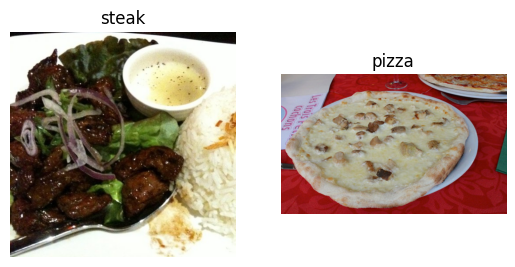

In [24]:
# Visualize data
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

Image shape: (512, 512, 3)
Image shape: (384, 512, 3)
Image shape: (512, 512, 3)
Image shape: (384, 512, 3)


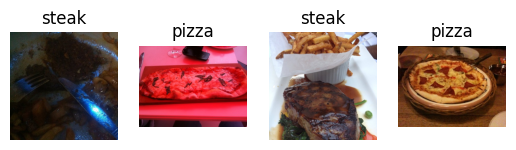

In [25]:
# Visualize data
plt.figure()
plt.subplot(1,4,1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 4, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

plt.subplot(1,4,3)
steak_img1 = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 4, 4)
pizza_img1 = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data (prepare it fot the model)

In [26]:
# Define the directory dataset path
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

In [27]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [28]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [29]:
# Load in our image data from directories and turn them into batches
tain_data = train_datagen.flow_from_directory(directory=train_dir,
                                              target_size=(224, 224), # Target size of images (height, width)
                                              class_mode="binary", # type of data you're working with
                                              batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                            target_size=(224, 224),
                                            class_mode="binary",
                                            batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [30]:
# Get a sample of a train data batch
images, labels = next(train_data) # get the "next" batch of images/labels in train_data
len(images), len(labels)

(32, 32)

In [31]:
# How many batches are there
len(train_data)

47

In [32]:
1500/32

46.875

In [33]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.03137255, 0.03529412, 0.01568628],
          [0.03529412, 0.03921569, 0.01960784],
          [0.03137255, 0.03529412, 0.01568628],
          ...,
          [0.0509804 , 0.05882353, 0.10588236],
          [0.05882353, 0.0627451 , 0.07843138],
          [0.05490196, 0.0627451 , 0.05882353]],
 
         [[0.03529412, 0.03921569, 0.01960784],
          [0.02745098, 0.03137255, 0.01176471],
          [0.02745098, 0.03137255, 0.01176471],
          ...,
          [0.0509804 , 0.05882353, 0.10588236],
          [0.05882353, 0.0627451 , 0.08235294],
          [0.04705883, 0.0509804 , 0.05882353]],
 
         [[0.03529412, 0.03921569, 0.01960784],
          [0.02745098, 0.03137255, 0.01176471],
          [0.02745098, 0.03137255, 0.01176471],
          ...,
          [0.0509804 , 0.05882353, 0.10980393],
          [0.06666667, 0.06666667, 0.10588236],
          [0.04705883, 0.0509804 , 0.07058824]],
 
         ...,
 
         [[0.40000004, 0.36078432, 0.3137255 ],
          [0.28627

### 3. Ceate a CNN model (start with a baseline)

In [5]:
# Make the creating of our model a little easie
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [3]:
# Create the model (this will be our baseline)
model_4 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding="valid",
           activation="relu",
           input_shape=(224, 224, 3)), # input layer (specify input shape)
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid") # output layer (working with binary classification so only one(1) output neuron)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [7]:
# summay of model_4
model_4.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 218, 218, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 475240)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │       475,241 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 477,341 (1.82 MB)

 Trainable params: 477,341 (1.82 MB)

 Non-trainable params: 0 (0.00 B)